In [1]:
### Correlation

In [2]:
#Dependencies
#conda install reportlab
import pandas as pd
import numpy as np
import matplotlib
import os
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import itertools

In [3]:
#constants
markersize = 2

In [4]:
#report path
report_location = r"C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\report"

#code name samples path
code_name_path = r"C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\TRANSFLECTANCIA NOV 23\CODE NAME SAMPLES.txt"

#optical properties datapath
transflectance_data_path = r"C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\new_data\2023NOV_TRANSFLECTANCE\transflectance\average"
transmittance_data_path = r"C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\clean_data\transmittance"
absorptance_data_path = r"C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\clean_data\absorptance"
reflectance_data_path = r"C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\clean_data\reflectance"

#Solar spectral irradiance datapath
solar_irradiance_data_path = r"C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\reflectivity\ASTM G173-03 (2020).txt"


In [5]:
def list_files_in_folder(folder_path):
    files_only_in_folder = []
    
    # Get the list of all files in the folder and its subfolders
    all_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            all_files.append(os.path.join(root, file))
    
    # Get the list of files that are only in the top-level folder
    for file in all_files:
        if os.path.isfile(file) and os.path.dirname(file) == folder_path:
            files_only_in_folder.append(file)
    
    return files_only_in_folder

In [6]:
transflectance_file_list = list_files_in_folder(transflectance_data_path)
transmittance_file_list = list_files_in_folder(transmittance_data_path)
absorptance_file_list = list_files_in_folder(absorptance_data_path)
reflectance_file_list = list_files_in_folder(reflectance_data_path)
irradiance_file_list = [solar_irradiance_data_path]
for file in irradiance_file_list: 
    print(file)
print(len(transmittance_file_list))
print(len(absorptance_file_list))
print(len(irradiance_file_list))

C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\reflectivity\ASTM G173-03 (2020).txt
22
22
1


In [7]:
def read_dataframes(file_path_list, header_num, measurement_type1, measurement_type2=None): 
    dataframes = []
    
    for file_path in file_path_list:
        if measurement_type2 is None:
            # For a single measurement type
            df = pd.read_csv(file_path, sep='\t', header=header_num, names=['wavelength', measurement_type1]).dropna()
            
            # Replace commas with dots
            df = df.replace(',','.', regex=True)
            
            # Add columns and convert types
            df["file"] = file_path
            df["sample"] = os.path.basename(file_path).replace("-RX", "").replace(".txt", "").replace("_AVERAGE", "").replace("-TX", "").replace("-AX", "")
            df["measurement_type"] = measurement_type1
            df['wavelength'] = df['wavelength'].astype(float)
            df[measurement_type1] = df[measurement_type1].astype(float)
        else:
            # For two measurement types
            df = pd.read_csv(file_path, sep='\t', header=header_num, names=['wavelength', measurement_type1, measurement_type2]).dropna()
            
            # Replace commas with dots
            df = df.replace(',','.', regex=True)
            
            # Add columns and convert types
            df["file"] = file_path
            df["sample"] = os.path.basename(file_path)
            df["measurement_type"] = f"{measurement_type1}_{measurement_type2}"
            df['wavelength'] = df['wavelength'].astype(float)
            df[measurement_type1] = df[measurement_type1].astype(float)
            df[measurement_type2] = df[measurement_type2].astype(float)
        
        # Append the dataframe to the list
        dataframes.append(df)
        
    return dataframes


## Dataframes 

In [8]:
reflectance_dfs = read_dataframes(reflectance_file_list,0, "reflectance")
transmittance_dfs = read_dataframes(transmittance_file_list,0, "transmittance")
absorptance_dfs = read_dataframes(absorptance_file_list,0, "absorptance")
irradiance_dfs = read_dataframes(irradiance_file_list,7, "tilt_irradiance", "normal_irradiance")

In [9]:
for df in irradiance_dfs:
    df = df[~df['wavelength'].astype(str).str.endswith('.5')]
    #print(df)
    irradiance_dfs = [df]
irradiance_dfs[0]

,wavelength,tilt_irradiance,normal_irradiance,file,sample,measurement_type
0,283.0,1.850000e-17,6.760000e-20,C:\Users\EstebanSoto\Documents\Estudio Optico ...,ASTM G173-03 (2020).txt,tilt_irradiance_normal_irradiance
2,284.0,7.270000e-16,4.980000e-18,C:\Users\EstebanSoto\Documents\Estudio Optico ...,ASTM G173-03 (2020).txt,tilt_irradiance_normal_irradiance
4,285.0,8.010000e-15,9.000000e-17,C:\Users\EstebanSoto\Documents\Estudio Optico ...,ASTM G173-03 (2020).txt,tilt_irradiance_normal_irradiance
6,286.0,1.370000e-13,2.350000e-15,C:\Users\EstebanSoto\Documents\Estudio Optico ...,ASTM G173-03 (2020).txt,tilt_irradiance_normal_irradiance
8,287.0,2.740000e-12,7.250000e-14,C:\Users\EstebanSoto\Documents\Estudio Optico ...,ASTM G173-03 (2020).txt,tilt_irradiance_normal_irradiance
...,...,...,...,...,...,...
1717,2610.0,0.000000e+00,0.000000e+00,C:\Users\EstebanSoto\Documents\Estudio Optico ...,ASTM G173-03 (2020).txt,tilt_irradiance_normal_irradiance
1718,2615.0,0.000000e+00,0.000000e+00,C:\Users\EstebanSoto\Documents\Estudio Optico ...,ASTM G173-03 (2020).txt,tilt_irradiance_normal_irradiance
1719,2620.0,0.000000e+00,0.000000e+00,C:\Users\EstebanSoto\Documents\Estudio Optico ...,ASTM G173-03 (2020).txt,tilt_irradiance_normal_irradiance
1720,2625.0,0.000000e+00,0.000000e+00,C:\Users\EstebanSoto\Documents\Estudio Optico ...,ASTM G173-03 (2020).txt,tilt_irradiance_normal_irradiance


In [10]:
# Test 

In [11]:
sample_consolidated_df = pd.DataFrame([])

for df in reflectance_dfs:
    if df["sample"].iloc[0] == "C.AURI.INBI" :
        sample_consolidated_df["reflectance"] = df["reflectance"]
        sample_consolidated_df["wavelength"] = df["wavelength"]
        print(True)
sample_consolidated_df
        
#sample_consolidated_df

for df in transmittance_dfs:
    if df["sample"].iloc[0] == "C.AURI.INBI" :
        sample_consolidated_df["transmittance"] = df["transmittance"]
        print(True)
sample_consolidated_df

for df in absorptance_dfs:
    if df["sample"].iloc[0] == "C.AURI.INBI" :
        sample_consolidated_df["absorptance"] = df["absorptance"]
        print(True)
        
sample_consolidated_df =sample_consolidated_df.dropna()
sample_consolidated_df["total"] = sample_consolidated_df["absorptance"]+sample_consolidated_df["transmittance"]+sample_consolidated_df["reflectance"]
print(sample_consolidated_df[sample_consolidated_df["total"]<110].sort_values(by="wavelength", ascending=True))

True
True
True
      reflectance  wavelength  transmittance  absorptance  total
0        5.886583       256.0       0.331562    93.781855  100.0
1        5.870086       257.0       0.330087    93.799827  100.0
2        5.839215       258.0       0.331627    93.829158  100.0
3        5.810737       259.0       0.331079    93.858183  100.0
4        5.777950       260.0       0.331904    93.890146  100.0
...           ...         ...            ...          ...    ...
1740    14.775769      1996.0      55.608428    29.615803  100.0
1741    14.921706      1997.0      55.656792    29.421502  100.0
1742    15.245528      1998.0      55.691217    29.063255  100.0
1743    15.455754      1999.0      55.679737    28.864509  100.0
1744    15.532976      2000.0      55.764685    28.702340  100.0

[1745 rows x 5 columns]


## Optical Properties By Range

In [12]:
optical_properties = pd.DataFrame([])

In [13]:
def filter_dataframes_by_range(min_wavelength, max_wavelength, dataframe_list):
    filtered_dataframes = []
    
    for df in dataframe_list:
        # Assuming the wavelength column in each DataFrame is named 'wavelength'
        filtered_df = df[(df['wavelength'] >= min_wavelength) & (df['wavelength'] <= max_wavelength)]
        filtered_dataframes.append(filtered_df)
    
    return filtered_dataframes


In [14]:
def get_optical_property(measurement_type):
    switch_dict = {
        'transmittance': 'transmitivity',
        'reflectance': 'reflectivity',
        'absorptance': 'absorptivity'
    }

    return switch_dict.get(measurement_type, 'optical_property')

In [15]:
def optical_properties_by_range(min_wv, max_wv, optical_property_dfs, irradiance_dfs, measurement_type):
    filtered_optical_property_dfs = filter_dataframes_by_range(min_wv, max_wv, optical_property_dfs)
    print(len(filtered_optical_property_dfs))
    filtered_irradiance_dfs = filter_dataframes_by_range(min_wv, max_wv, irradiance_dfs)
    print(filtered_irradiance_dfs)
    properties = []

    for optical_property_df in filtered_optical_property_dfs:
        print(len(optical_property_df))
        for irradiance_df in filtered_irradiance_dfs:
            print("irr len")
            print(len(irradiance_df))
            print(optical_property_df)
            # Calculate total irradiance
            sum_irradiance = irradiance_df['normal_irradiance'].sum()
            #print(sum_irradiance)
            # Interpolate irradiance data to match the wavelength values of optical property data
            #interpolated_irradiance = np.interp(optical_property_df['wavelength'], irradiance_df['wavelength'], irradiance_df['normal_irradiance'], left=0, right=0)

            # Calculate the multiplied values
            result_intensity = optical_property_df[measurement_type] * irradiance_df['normal_irradiance']

            # Create a new DataFrame with the multiplied values
            result_dataset = pd.DataFrame({'wavelength': optical_property_df['wavelength'], measurement_type: result_intensity, 'sample': optical_property_df['sample']})

            # Calculate sum of optical property
            sum_optical_property = result_dataset.groupby('sample')[measurement_type].sum()
            #print(sum_optical_property[0])
            
            # Calculate the optical property value
            optical_property = get_optical_property(measurement_type)
            result = {'sample': result_dataset['sample'].iloc[0], optical_property: sum_optical_property[0] / sum_irradiance}
            properties.append(result)

    properties_df = pd.DataFrame(properties, columns=['sample', optical_property]).sort_values(by=optical_property, ascending=False)
    return properties_df

In [16]:
#filtered_irradiance_dfs = filter_dataframes_by_range(min_wv, max_wv, irradiance_dfs)
for df in irradiance_dfs:
    print(df.sort_values(by="normal_irradiance", ascending=False).sum()) 

wavelength                                                   1810804.0
tilt_irradiance                                             955.216044
normal_irradiance                                           855.561766
file                 C:\Users\EstebanSoto\Documents\Estudio Optico ...
sample               ASTM G173-03 (2020).txtASTM G173-03 (2020).txt...
measurement_type     tilt_irradiance_normal_irradiancetilt_irradian...
dtype: object


# Reflectivity

## General Reflectivity

In [17]:
#Full range
min_wv = 283 #nm
max_wv = 2000 #nm

reflectivity = optical_properties_by_range(min_wv, max_wv, reflectance_dfs, irradiance_dfs, "reflectance")
print(reflectivity)
optical_properties = reflectivity
print(optical_properties)

22
[      wavelength  tilt_irradiance  normal_irradiance  \
0          283.0     1.850000e-17       6.760000e-20   
2          284.0     7.270000e-16       4.980000e-18   
4          285.0     8.010000e-15       9.000000e-17   
6          286.0     1.370000e-13       2.350000e-15   
8          287.0     2.740000e-12       7.250000e-14   
...          ...              ...                ...   
1591      1980.0     7.550000e-02       7.420000e-02   
1592      1985.0     8.310000e-02       8.160000e-02   
1593      1990.0     8.560000e-02       8.410000e-02   
1594      1995.0     8.120000e-02       7.980000e-02   
1595      2000.0     3.820000e-02       3.750000e-02   

                                                   file  \
0     C:\Users\EstebanSoto\Documents\Estudio Optico ...   
2     C:\Users\EstebanSoto\Documents\Estudio Optico ...   
4     C:\Users\EstebanSoto\Documents\Estudio Optico ...   
6     C:\Users\EstebanSoto\Documents\Estudio Optico ...   
8     C:\Users\EstebanSoto\D

## UV Reflectivity

In [18]:
#Full range
uv_min_wv = 283 #nm
uv_max_wv = 399 #nm

uv_reflectivity = optical_properties_by_range(uv_min_wv, uv_max_wv, reflectance_dfs, irradiance_dfs, "reflectance")
#print(uv_reflectivity)
optical_properties["uv_reflectivity"] = uv_reflectivity["reflectivity"]
#print(optical_properties)

22
[     wavelength  tilt_irradiance  normal_irradiance  \
0         283.0     1.850000e-17       6.760000e-20   
2         284.0     7.270000e-16       4.980000e-18   
4         285.0     8.010000e-15       9.000000e-17   
6         286.0     1.370000e-13       2.350000e-15   
8         287.0     2.740000e-12       7.250000e-14   
..          ...              ...                ...   
224       395.0     8.077000e-01       6.010000e-01   
226       396.0     7.566000e-01       5.644000e-01   
228       397.0     4.262000e-01       3.188000e-01   
230       398.0     8.525000e-01       6.394000e-01   
232       399.0     1.069300e+00       8.041000e-01   

                                                  file  \
0    C:\Users\EstebanSoto\Documents\Estudio Optico ...   
2    C:\Users\EstebanSoto\Documents\Estudio Optico ...   
4    C:\Users\EstebanSoto\Documents\Estudio Optico ...   
6    C:\Users\EstebanSoto\Documents\Estudio Optico ...   
8    C:\Users\EstebanSoto\Documents\Estudio O

## VIS Reflectivity

In [19]:

vis_min_wv = 400 #nm
vis_max_wv = 699 #nm

vis_reflectivity = optical_properties_by_range(vis_min_wv, vis_max_wv, reflectance_dfs, irradiance_dfs, "reflectance")
#print(vis_reflectivity)
optical_properties["vis_reflectivity"] = vis_reflectivity["reflectivity"]
#print(optical_properties)

22
[     wavelength  tilt_irradiance  normal_irradiance  \
234       400.0           1.1141             0.8399   
235       401.0           1.1603             0.8769   
236       402.0           1.2061             0.9139   
237       403.0           1.1613             0.8821   
238       404.0           1.1801             0.8985   
..          ...              ...                ...   
529       695.0           1.2714             1.1538   
530       696.0           1.2684             1.1513   
531       697.0           1.3403             1.2151   
532       698.0           1.3192             1.1961   
533       699.0           1.2918             1.1721   

                                                  file  \
234  C:\Users\EstebanSoto\Documents\Estudio Optico ...   
235  C:\Users\EstebanSoto\Documents\Estudio Optico ...   
236  C:\Users\EstebanSoto\Documents\Estudio Optico ...   
237  C:\Users\EstebanSoto\Documents\Estudio Optico ...   
238  C:\Users\EstebanSoto\Documents\Estudio O

300
irr len
300
     wavelength  reflectance  \
144       400.0     5.350885   
145       401.0     5.344195   
146       402.0     5.336607   
147       403.0     5.328423   
148       404.0     5.320254   
..          ...          ...   
439       695.0     7.830011   
440       696.0     7.880127   
441       697.0     7.926564   
442       698.0     7.971616   
443       699.0     8.016553   

                                                  file   sample  \
144  C:\Users\EstebanSoto\Documents\Estudio Optico ...  NI#0002   
145  C:\Users\EstebanSoto\Documents\Estudio Optico ...  NI#0002   
146  C:\Users\EstebanSoto\Documents\Estudio Optico ...  NI#0002   
147  C:\Users\EstebanSoto\Documents\Estudio Optico ...  NI#0002   
148  C:\Users\EstebanSoto\Documents\Estudio Optico ...  NI#0002   
..                                                 ...      ...   
439  C:\Users\EstebanSoto\Documents\Estudio Optico ...  NI#0002   
440  C:\Users\EstebanSoto\Documents\Estudio Optico ...  NI#0002

In [20]:
# UV 100 to 400 nm
ir_min_wv = 700 #nm
ir_max_wv = 2200 #nm

ir_reflectivity = optical_properties_by_range(ir_min_wv, ir_max_wv, reflectance_dfs, irradiance_dfs, "reflectance")
#print(ir_reflectivity)
optical_properties["ir_reflectivity"] = ir_reflectivity["reflectivity"]
#print(optical_properties)

22
[      wavelength  tilt_irradiance  normal_irradiance  \
534        700.0           1.2823             1.1636   
535        701.0           1.2659             1.1489   
536        702.0           1.2674             1.1500   
537        703.0           1.2747             1.1567   
538        704.0           1.3078             1.1864   
...          ...              ...                ...   
1631      2180.0           0.0818             0.0806   
1632      2185.0           0.0746             0.0735   
1633      2190.0           0.0791             0.0779   
1634      2195.0           0.0790             0.0778   
1635      2200.0           0.0712             0.0702   

                                                   file  \
534   C:\Users\EstebanSoto\Documents\Estudio Optico ...   
535   C:\Users\EstebanSoto\Documents\Estudio Optico ...   
536   C:\Users\EstebanSoto\Documents\Estudio Optico ...   
537   C:\Users\EstebanSoto\Documents\Estudio Optico ...   
538   C:\Users\EstebanSoto\D

# Transmitivity

## General

In [21]:
#Full range
min_wv = 283 #nm
max_wv = 2000 #nm

transmitivity = optical_properties_by_range(min_wv, max_wv, transmittance_dfs, irradiance_dfs, "transmittance")
#print(transmitivity)
optical_properties["transmitivity"] = transmitivity["transmitivity"]
#print(optical_properties)

22
[      wavelength  tilt_irradiance  normal_irradiance  \
0          283.0     1.850000e-17       6.760000e-20   
2          284.0     7.270000e-16       4.980000e-18   
4          285.0     8.010000e-15       9.000000e-17   
6          286.0     1.370000e-13       2.350000e-15   
8          287.0     2.740000e-12       7.250000e-14   
...          ...              ...                ...   
1591      1980.0     7.550000e-02       7.420000e-02   
1592      1985.0     8.310000e-02       8.160000e-02   
1593      1990.0     8.560000e-02       8.410000e-02   
1594      1995.0     8.120000e-02       7.980000e-02   
1595      2000.0     3.820000e-02       3.750000e-02   

                                                   file  \
0     C:\Users\EstebanSoto\Documents\Estudio Optico ...   
2     C:\Users\EstebanSoto\Documents\Estudio Optico ...   
4     C:\Users\EstebanSoto\Documents\Estudio Optico ...   
6     C:\Users\EstebanSoto\Documents\Estudio Optico ...   
8     C:\Users\EstebanSoto\D

1718
irr len
1479
      wavelength  transmittance  \
27         283.0       0.190193   
28         284.0       0.190034   
29         285.0       0.190855   
30         286.0       0.189988   
31         287.0       0.191793   
...          ...            ...   
1740      1996.0      24.185272   
1741      1997.0      24.200882   
1742      1998.0      24.306317   
1743      1999.0      24.395981   
1744      2000.0      24.438270   

                                                   file     sample  \
27    C:\Users\EstebanSoto\Documents\Estudio Optico ...  PLATY.001   
28    C:\Users\EstebanSoto\Documents\Estudio Optico ...  PLATY.001   
29    C:\Users\EstebanSoto\Documents\Estudio Optico ...  PLATY.001   
30    C:\Users\EstebanSoto\Documents\Estudio Optico ...  PLATY.001   
31    C:\Users\EstebanSoto\Documents\Estudio Optico ...  PLATY.001   
...                                                 ...        ...   
1740  C:\Users\EstebanSoto\Documents\Estudio Optico ...  PLATY.001   
1

## UV

In [22]:
# UV 100 to 400 nm
uv_min_wv = 283 #nm
uv_max_wv = 399 #nm

uv_transmitivity = optical_properties_by_range(uv_min_wv, uv_max_wv, transmittance_dfs, irradiance_dfs, "transmittance")
#print(uv_transmitivity)
optical_properties["uv_transmitivity"] = uv_transmitivity["transmitivity"]
#print(optical_properties)

22
[     wavelength  tilt_irradiance  normal_irradiance  \
0         283.0     1.850000e-17       6.760000e-20   
2         284.0     7.270000e-16       4.980000e-18   
4         285.0     8.010000e-15       9.000000e-17   
6         286.0     1.370000e-13       2.350000e-15   
8         287.0     2.740000e-12       7.250000e-14   
..          ...              ...                ...   
224       395.0     8.077000e-01       6.010000e-01   
226       396.0     7.566000e-01       5.644000e-01   
228       397.0     4.262000e-01       3.188000e-01   
230       398.0     8.525000e-01       6.394000e-01   
232       399.0     1.069300e+00       8.041000e-01   

                                                  file  \
0    C:\Users\EstebanSoto\Documents\Estudio Optico ...   
2    C:\Users\EstebanSoto\Documents\Estudio Optico ...   
4    C:\Users\EstebanSoto\Documents\Estudio Optico ...   
6    C:\Users\EstebanSoto\Documents\Estudio Optico ...   
8    C:\Users\EstebanSoto\Documents\Estudio O

117
irr len
117
     wavelength  transmittance  \
27        283.0       0.232114   
28        284.0       0.233329   
29        285.0       0.235369   
30        286.0       0.234456   
31        287.0       0.232848   
..          ...            ...   
139       395.0       0.440104   
140       396.0       0.441544   
141       397.0       0.443020   
142       398.0       0.444015   
143       399.0       0.444741   

                                                  file       sample  \
27   C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.CHRY.MV73   
28   C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.CHRY.MV73   
29   C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.CHRY.MV73   
30   C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.CHRY.MV73   
31   C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.CHRY.MV73   
..                                                 ...          ...   
139  C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.CHRY.MV73   
140  C:

117
irr len
117
     wavelength  transmittance  \
27        283.0       0.243000   
28        284.0       0.243836   
29        285.0       0.246034   
30        286.0       0.246748   
31        287.0       0.245451   
..          ...            ...   
139       395.0       1.827655   
140       396.0       1.877629   
141       397.0       1.928415   
142       398.0       1.980121   
143       399.0       2.031883   

                                                  file     sample  \
27   C:\Users\EstebanSoto\Documents\Estudio Optico ...  PELID.002   
28   C:\Users\EstebanSoto\Documents\Estudio Optico ...  PELID.002   
29   C:\Users\EstebanSoto\Documents\Estudio Optico ...  PELID.002   
30   C:\Users\EstebanSoto\Documents\Estudio Optico ...  PELID.002   
31   C:\Users\EstebanSoto\Documents\Estudio Optico ...  PELID.002   
..                                                 ...        ...   
139  C:\Users\EstebanSoto\Documents\Estudio Optico ...  PELID.002   
140  C:\Users\EstebanSo

## Vis

In [23]:
# UV 100 to 400 nm
vis_min_wv = 400 #nm
vis_max_wv = 699 #nm

vis_transmitivity = optical_properties_by_range(vis_min_wv, vis_max_wv, transmittance_dfs, irradiance_dfs, "transmittance")
#print(vis_transmitivity)
optical_properties["vis_transmitivity"] = vis_transmitivity["transmitivity"]
#print(optical_properties)

22
[     wavelength  tilt_irradiance  normal_irradiance  \
234       400.0           1.1141             0.8399   
235       401.0           1.1603             0.8769   
236       402.0           1.2061             0.9139   
237       403.0           1.1613             0.8821   
238       404.0           1.1801             0.8985   
..          ...              ...                ...   
529       695.0           1.2714             1.1538   
530       696.0           1.2684             1.1513   
531       697.0           1.3403             1.2151   
532       698.0           1.3192             1.1961   
533       699.0           1.2918             1.1721   

                                                  file  \
234  C:\Users\EstebanSoto\Documents\Estudio Optico ...   
235  C:\Users\EstebanSoto\Documents\Estudio Optico ...   
236  C:\Users\EstebanSoto\Documents\Estudio Optico ...   
237  C:\Users\EstebanSoto\Documents\Estudio Optico ...   
238  C:\Users\EstebanSoto\Documents\Estudio O

300
irr len
300
     wavelength  transmittance  \
144       400.0       0.721675   
145       401.0       0.720250   
146       402.0       0.719283   
147       403.0       0.718266   
148       404.0       0.717767   
..          ...            ...   
439       695.0      15.573538   
440       696.0      15.751353   
441       697.0      15.929147   
442       698.0      16.107556   
443       699.0      16.286433   

                                                  file   sample  \
144  C:\Users\EstebanSoto\Documents\Estudio Optico ...  NI#0001   
145  C:\Users\EstebanSoto\Documents\Estudio Optico ...  NI#0001   
146  C:\Users\EstebanSoto\Documents\Estudio Optico ...  NI#0001   
147  C:\Users\EstebanSoto\Documents\Estudio Optico ...  NI#0001   
148  C:\Users\EstebanSoto\Documents\Estudio Optico ...  NI#0001   
..                                                 ...      ...   
439  C:\Users\EstebanSoto\Documents\Estudio Optico ...  NI#0001   
440  C:\Users\EstebanSoto\Documents\Est

## IR

In [24]:
# UV 100 to 400 nm
ir_min_wv = 700 #nm
ir_max_wv = 2000 #nm

ir_transmitivity = optical_properties_by_range(ir_min_wv, ir_max_wv, transmittance_dfs, irradiance_dfs, "transmittance")
#print(ir_transmitivity)
optical_properties["ir_transmitivity"] = ir_transmitivity["transmitivity"]
#print(optical_properties)


22
[      wavelength  tilt_irradiance  normal_irradiance  \
534        700.0           1.2823             1.1636   
535        701.0           1.2659             1.1489   
536        702.0           1.2674             1.1500   
537        703.0           1.2747             1.1567   
538        704.0           1.3078             1.1864   
...          ...              ...                ...   
1591      1980.0           0.0755             0.0742   
1592      1985.0           0.0831             0.0816   
1593      1990.0           0.0856             0.0841   
1594      1995.0           0.0812             0.0798   
1595      2000.0           0.0382             0.0375   

                                                   file  \
534   C:\Users\EstebanSoto\Documents\Estudio Optico ...   
535   C:\Users\EstebanSoto\Documents\Estudio Optico ...   
536   C:\Users\EstebanSoto\Documents\Estudio Optico ...   
537   C:\Users\EstebanSoto\Documents\Estudio Optico ...   
538   C:\Users\EstebanSoto\D

1301
irr len
1062
      wavelength  transmittance  \
444        700.0      26.270305   
445        701.0      26.452125   
446        702.0      26.629863   
447        703.0      26.806803   
448        704.0      26.983556   
...          ...            ...   
1740      1996.0      45.854959   
1741      1997.0      45.836199   
1742      1998.0      45.838947   
1743      1999.0      45.847352   
1744      2000.0      45.872884   

                                                   file       sample  \
444   C:\Users\EstebanSoto\Documents\Estudio Optico ...  P.GRAT.3610   
445   C:\Users\EstebanSoto\Documents\Estudio Optico ...  P.GRAT.3610   
446   C:\Users\EstebanSoto\Documents\Estudio Optico ...  P.GRAT.3610   
447   C:\Users\EstebanSoto\Documents\Estudio Optico ...  P.GRAT.3610   
448   C:\Users\EstebanSoto\Documents\Estudio Optico ...  P.GRAT.3610   
...                                                 ...          ...   
1740  C:\Users\EstebanSoto\Documents\Estudio Optico ...  

# Absorptivity

## General

In [25]:
#Full range
min_wv = 283 #nm
max_wv = 2000 #nm

absorptivity = optical_properties_by_range(min_wv, max_wv, absorptance_dfs, irradiance_dfs, "absorptance")
#print(absorptivity)
optical_properties["absorptivity"] = absorptivity["absorptivity"]
#print(optical_properties)

22
[      wavelength  tilt_irradiance  normal_irradiance  \
0          283.0     1.850000e-17       6.760000e-20   
2          284.0     7.270000e-16       4.980000e-18   
4          285.0     8.010000e-15       9.000000e-17   
6          286.0     1.370000e-13       2.350000e-15   
8          287.0     2.740000e-12       7.250000e-14   
...          ...              ...                ...   
1591      1980.0     7.550000e-02       7.420000e-02   
1592      1985.0     8.310000e-02       8.160000e-02   
1593      1990.0     8.560000e-02       8.410000e-02   
1594      1995.0     8.120000e-02       7.980000e-02   
1595      2000.0     3.820000e-02       3.750000e-02   

                                                   file  \
0     C:\Users\EstebanSoto\Documents\Estudio Optico ...   
2     C:\Users\EstebanSoto\Documents\Estudio Optico ...   
4     C:\Users\EstebanSoto\Documents\Estudio Optico ...   
6     C:\Users\EstebanSoto\Documents\Estudio Optico ...   
8     C:\Users\EstebanSoto\D

1718
irr len
1479
      wavelength  absorptance  \
27         283.0    94.247306   
28         284.0    94.252165   
29         285.0    94.261752   
30         286.0    94.263363   
31         287.0    94.259961   
...          ...          ...   
1740      1996.0    34.103322   
1741      1997.0    33.981919   
1742      1998.0    33.811114   
1743      1999.0    33.686401   
1744      2000.0    33.570048   

                                                   file       sample  \
27    C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.OPTI.8.17   
28    C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.OPTI.8.17   
29    C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.OPTI.8.17   
30    C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.OPTI.8.17   
31    C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.OPTI.8.17   
...                                                 ...          ...   
1740  C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.OPTI.8.17   
1741  C:\

In [26]:
#UV

In [27]:
#Full range
uv_min_wv = 283 #nm
uv_max_wv = 399 #nm

uv_absorptivity = optical_properties_by_range(uv_min_wv, uv_max_wv, absorptance_dfs, irradiance_dfs, "absorptance")
#print(uv_absorptivity)
optical_properties["uv_absorptivity"] = uv_absorptivity["absorptivity"]
#print(optical_properties)

22
[     wavelength  tilt_irradiance  normal_irradiance  \
0         283.0     1.850000e-17       6.760000e-20   
2         284.0     7.270000e-16       4.980000e-18   
4         285.0     8.010000e-15       9.000000e-17   
6         286.0     1.370000e-13       2.350000e-15   
8         287.0     2.740000e-12       7.250000e-14   
..          ...              ...                ...   
224       395.0     8.077000e-01       6.010000e-01   
226       396.0     7.566000e-01       5.644000e-01   
228       397.0     4.262000e-01       3.188000e-01   
230       398.0     8.525000e-01       6.394000e-01   
232       399.0     1.069300e+00       8.041000e-01   

                                                  file  \
0    C:\Users\EstebanSoto\Documents\Estudio Optico ...   
2    C:\Users\EstebanSoto\Documents\Estudio Optico ...   
4    C:\Users\EstebanSoto\Documents\Estudio Optico ...   
6    C:\Users\EstebanSoto\Documents\Estudio Optico ...   
8    C:\Users\EstebanSoto\Documents\Estudio O

117
irr len
117
     wavelength  absorptance  \
27        283.0    94.706009   
28        284.0    94.710556   
29        285.0    94.716119   
30        286.0    94.716622   
31        287.0    94.722547   
..          ...          ...   
139       395.0    95.133189   
140       396.0    95.137715   
141       397.0    95.140499   
142       398.0    95.140447   
143       399.0    95.140429   

                                                  file       sample  \
27   C:\Users\EstebanSoto\Documents\Estudio Optico ...  M.HIRT.DIUR   
28   C:\Users\EstebanSoto\Documents\Estudio Optico ...  M.HIRT.DIUR   
29   C:\Users\EstebanSoto\Documents\Estudio Optico ...  M.HIRT.DIUR   
30   C:\Users\EstebanSoto\Documents\Estudio Optico ...  M.HIRT.DIUR   
31   C:\Users\EstebanSoto\Documents\Estudio Optico ...  M.HIRT.DIUR   
..                                                 ...          ...   
139  C:\Users\EstebanSoto\Documents\Estudio Optico ...  M.HIRT.DIUR   
140  C:\Users\EstebanSoto\Docum

In [28]:
#Vis

In [29]:
#Full range
vis_min_wv = 400 #nm
vis_max_wv = 699 #nm

vis_absorptivity = optical_properties_by_range(vis_min_wv, vis_max_wv, absorptance_dfs, irradiance_dfs, "absorptance")
print(vis_absorptivity)
optical_properties["vis_absorptivity"] = vis_absorptivity["absorptivity"]
print(optical_properties)

22
[     wavelength  tilt_irradiance  normal_irradiance  \
234       400.0           1.1141             0.8399   
235       401.0           1.1603             0.8769   
236       402.0           1.2061             0.9139   
237       403.0           1.1613             0.8821   
238       404.0           1.1801             0.8985   
..          ...              ...                ...   
529       695.0           1.2714             1.1538   
530       696.0           1.2684             1.1513   
531       697.0           1.3403             1.2151   
532       698.0           1.3192             1.1961   
533       699.0           1.2918             1.1721   

                                                  file  \
234  C:\Users\EstebanSoto\Documents\Estudio Optico ...   
235  C:\Users\EstebanSoto\Documents\Estudio Optico ...   
236  C:\Users\EstebanSoto\Documents\Estudio Optico ...   
237  C:\Users\EstebanSoto\Documents\Estudio Optico ...   
238  C:\Users\EstebanSoto\Documents\Estudio O

## IR

In [30]:
#Full range
ir_min_wv = 700 #nm
ir_max_wv = 2000 #nm

ir_absorptivity = optical_properties_by_range(ir_min_wv, ir_max_wv, absorptance_dfs, irradiance_dfs, "absorptance")
print(ir_absorptivity)
optical_properties["ir_absorptivity"] = ir_absorptivity["absorptivity"]
print(optical_properties)

22
[      wavelength  tilt_irradiance  normal_irradiance  \
534        700.0           1.2823             1.1636   
535        701.0           1.2659             1.1489   
536        702.0           1.2674             1.1500   
537        703.0           1.2747             1.1567   
538        704.0           1.3078             1.1864   
...          ...              ...                ...   
1591      1980.0           0.0755             0.0742   
1592      1985.0           0.0831             0.0816   
1593      1990.0           0.0856             0.0841   
1594      1995.0           0.0812             0.0798   
1595      2000.0           0.0382             0.0375   

                                                   file  \
534   C:\Users\EstebanSoto\Documents\Estudio Optico ...   
535   C:\Users\EstebanSoto\Documents\Estudio Optico ...   
536   C:\Users\EstebanSoto\Documents\Estudio Optico ...   
537   C:\Users\EstebanSoto\Documents\Estudio Optico ...   
538   C:\Users\EstebanSoto\D

1301
irr len
1062
      wavelength  absorptance  \
444        700.0    24.895627   
445        701.0    24.558211   
446        702.0    24.227955   
447        703.0    23.906289   
448        704.0    23.577424   
...          ...          ...   
1740      1996.0    26.451642   
1741      1997.0    26.059093   
1742      1998.0    25.664986   
1743      1999.0    25.556313   
1744      2000.0    25.329440   

                                                   file       sample  \
444   C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.KALI.LA22   
445   C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.KALI.LA22   
446   C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.KALI.LA22   
447   C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.KALI.LA22   
448   C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.KALI.LA22   
...                                                 ...          ...   
1740  C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.KALI.LA22   
1741  C:\

In [31]:
#consolidated


In [32]:
def save_dataframe_as_text(reflectance_df, path, new_filename):
    """
    Save DataFrame as a tab-delimited text file.

    Parameters:
        reflectance_df (pandas.DataFrame): DataFrame to be saved.
        path (str): Directory path where the file will be saved.
        new_filename (str): Name of the new file.
    """
    # Get column headers and DataFrame values as a NumPy array
    headers = '\t'.join(reflectance_df.columns)
    my_numpy = reflectance_df.to_numpy()

    # Save headers and DataFrame values to a text file
    new_archive_name = path + "\\" + new_filename
    np.savetxt(new_archive_name, my_numpy, fmt='%s', delimiter="\t", header=headers, comments='')
    print(f"DataFrame saved as tab-delimited text to '{new_archive_name}'.")



In [33]:
save_dataframe_as_text(optical_properties, report_location, "reflectivity_absorptivity_transmitivity.txt", )


DataFrame saved as tab-delimited text to 'C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\report\reflectivity_absorptivity_transmitivity.txt'.


<Figure size 1000x600 with 0 Axes>

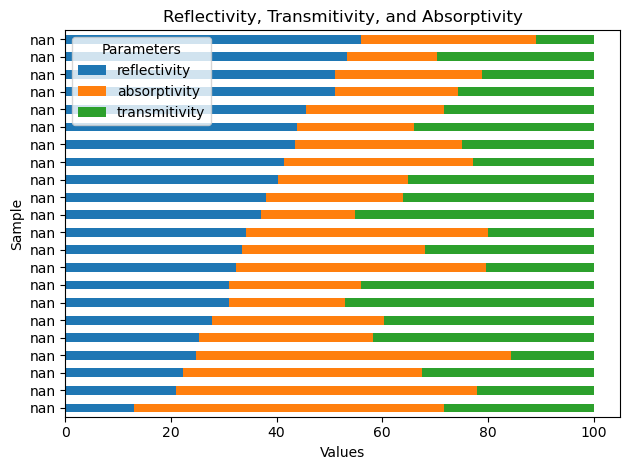

In [34]:
df = optical_properties
# Set the index to 'sample' column
df.set_index('sample', inplace=True)

# Select columns for plotting
columns_to_plot = ['reflectivity', 'absorptivity', 'transmitivity']

# Plotting stacked bar chart
plt.figure(figsize=(10, 6))
df[columns_to_plot].sort_values(by="reflectivity", ascending=True).plot(kind='barh', stacked=True)

# Add labels and title
plt.ylabel('Sample')
plt.xlabel('Values')
plt.title('Reflectivity, Transmitivity, and Absorptivity')

# Show plot
plt.legend(title='Parameters')
plt.tight_layout()
plt.show()

In [35]:
#optical_properties["uv_absorptivity"] = 1-optical_properties["uv_transmitivity"]-optical_properties["uv_reflectivity"]

<Figure size 1000x600 with 0 Axes>

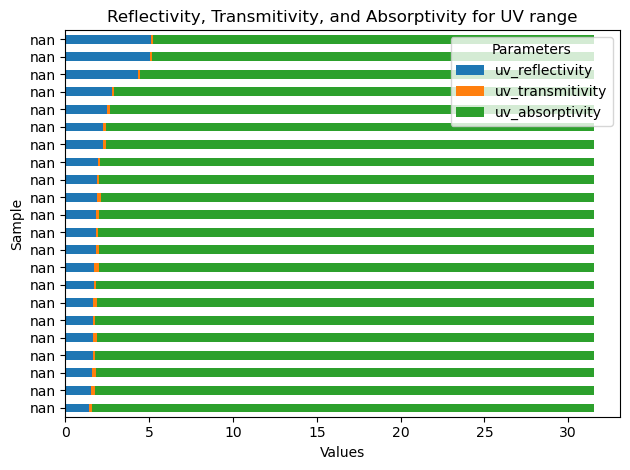

In [36]:
df = optical_properties
# Set the index to 'sample' column
#df.set_index('sample', inplace=True)

# Select columns for plotting
columns_to_plot = ['uv_reflectivity', 'uv_transmitivity', 'uv_absorptivity']

# Plotting stacked bar chart
plt.figure(figsize=(10, 6))
df[columns_to_plot].sort_values(by="uv_reflectivity", ascending=True).plot(kind='barh', stacked=True)

# Add labels and title
plt.ylabel('Sample')
plt.xlabel('Values')
plt.title('Reflectivity, Transmitivity, and Absorptivity for UV range')

# Show plot
plt.legend(title='Parameters')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

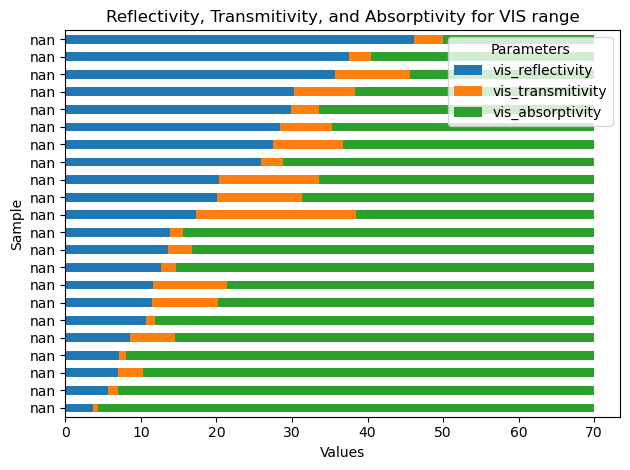

In [37]:
df = optical_properties

# Select columns for plotting
columns_to_plot = ['vis_reflectivity', 'vis_transmitivity', 'vis_absorptivity']

# Plotting stacked bar chart
plt.figure(figsize=(10, 6))
df[columns_to_plot].sort_values(by="vis_reflectivity", ascending=True).plot(kind='barh', stacked=True)

# Add labels and title
plt.ylabel('Sample')
plt.xlabel('Values')
plt.title('Reflectivity, Transmitivity, and Absorptivity for VIS range')

# Show plot
plt.legend(title='Parameters')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

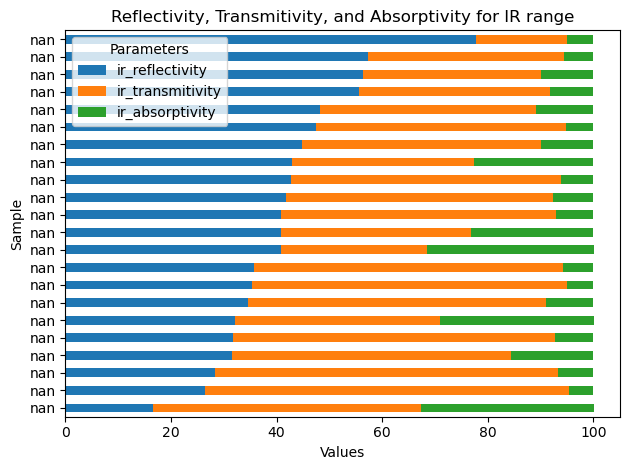

In [38]:
df = optical_properties

# Select columns for plotting
columns_to_plot = ['ir_reflectivity', 'ir_transmitivity', 'ir_absorptivity']

# Plotting stacked bar chart
plt.figure(figsize=(10, 6))
df[columns_to_plot].sort_values(by="ir_reflectivity", ascending=True).plot(kind='barh', stacked=True)

# Add labels and title
plt.ylabel('Sample')
plt.xlabel('Values')
plt.title('Reflectivity, Transmitivity, and Absorptivity for IR range')

# Show plot
plt.legend(title='Parameters')
plt.tight_layout()
plt.show()

In [39]:
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle
from reportlab.lib import colors
import pandas as pd

# Create a sample DataFrame
data = {'A': [1, 2, 3], 'B': ['apple', 'banana', 'orange']}
df = pd.DataFrame(data)

df = reflectivities_df
# Convert DataFrame to a list of lists (data suitable for a table)
data = [df.columns.tolist()] + df.values.tolist()

# Create a PDF file
pdf_filename = 'dataframe_table.pdf'
doc = SimpleDocTemplate(pdf_filename, pagesize=letter)

# Create a table from DataFrame data
table = Table(data)

# Add style to the table
style = TableStyle([('BACKGROUND', (0, 0), (-1, 0), colors.grey),
                    ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
                    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
                    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
                    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
                    ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
                    ('GRID', (0, 0), (-1, -1), 1, colors.black)])

table.setStyle(style)

# Build the PDF
elems = []
elems.append(table)
doc.build(elems)

print(f"PDF file '{pdf_filename}' has been created with the DataFrame table.")

ModuleNotFoundError: No module named 'reportlab'